<a href="https://colab.research.google.com/github/vaishnavisaindane/deep-learning/blob/main/exp4_gradient%20decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

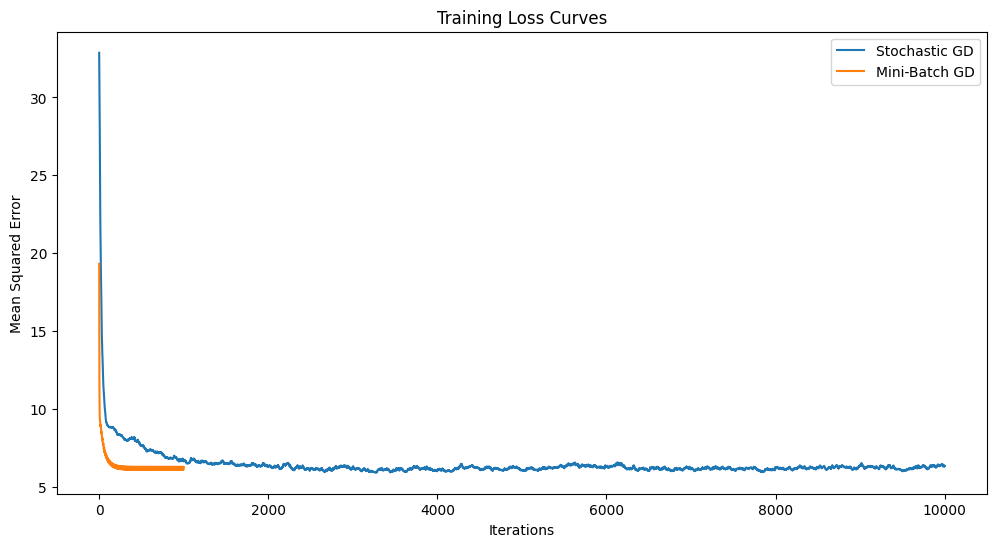

Stochastic Gradient Descent - Theta: [[4.20763452]
 [2.85589491]]
Mini-Batch Gradient Descent - Theta: [[4.24027403]
 [2.82495231]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=100):
    m = len(X)
    theta = np.random.randn(2, 1)
    loss_history = []

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = np.array([[1, X[random_index][0]]])  # Add a column of 1's for the bias term
            yi = y[random_index:random_index+1]
            gradient = xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradient
            loss = np.mean((X.dot(theta[1]) + theta[0] - y)**2)
            loss_history.append(loss)

    return theta, loss_history

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, batch_size=10, learning_rate=0.01, epochs=100):
    m = len(X)
    theta = np.random.randn(2, 1)
    loss_history = []

    for epoch in range(epochs):
        for i in range(0, m, batch_size):
            xi = np.hstack((np.ones((batch_size, 1)), X[i:i+batch_size]))  # Add a column of 1's for the bias term
            yi = y[i:i+batch_size]
            gradient = xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradient
            loss = np.mean((X.dot(theta[1]) + theta[0] - y)**2)
            loss_history.append(loss)

    return theta, loss_history

# Run SGD and Mini-Batch GD
sgd_theta, sgd_loss = stochastic_gradient_descent(X, y)
mbgd_theta, mbgd_loss = mini_batch_gradient_descent(X, y)

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(sgd_loss, label='Stochastic GD')
plt.plot(mbgd_loss, label='Mini-Batch GD')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Curves')
plt.legend()
plt.show()

# Print final theta values
print("Stochastic Gradient Descent - Theta:", sgd_theta)
print("Mini-Batch Gradient Descent - Theta:", mbgd_theta)
